<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[7].shape

# numpy array olduğundan shape methodunu çalıştırabiliyorum.28*28'lik renkli resimler var elimizde.

(28, 28)

In [6]:
X_train[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

In [7]:
y_train[7]

2

In [8]:
y_train.shape

(60000,)

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
np.unique(y_train, return_counts=True)

# train setinde de test setinde de bütün class'lar eşit dağılmış datamız dengeli.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [11]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [12]:
y_train[0]

9

In [13]:
classes[y_train[0]]

'Ankle boot'

In [14]:
classes[int(y_train[0])]  # classes[9]

'Ankle boot'

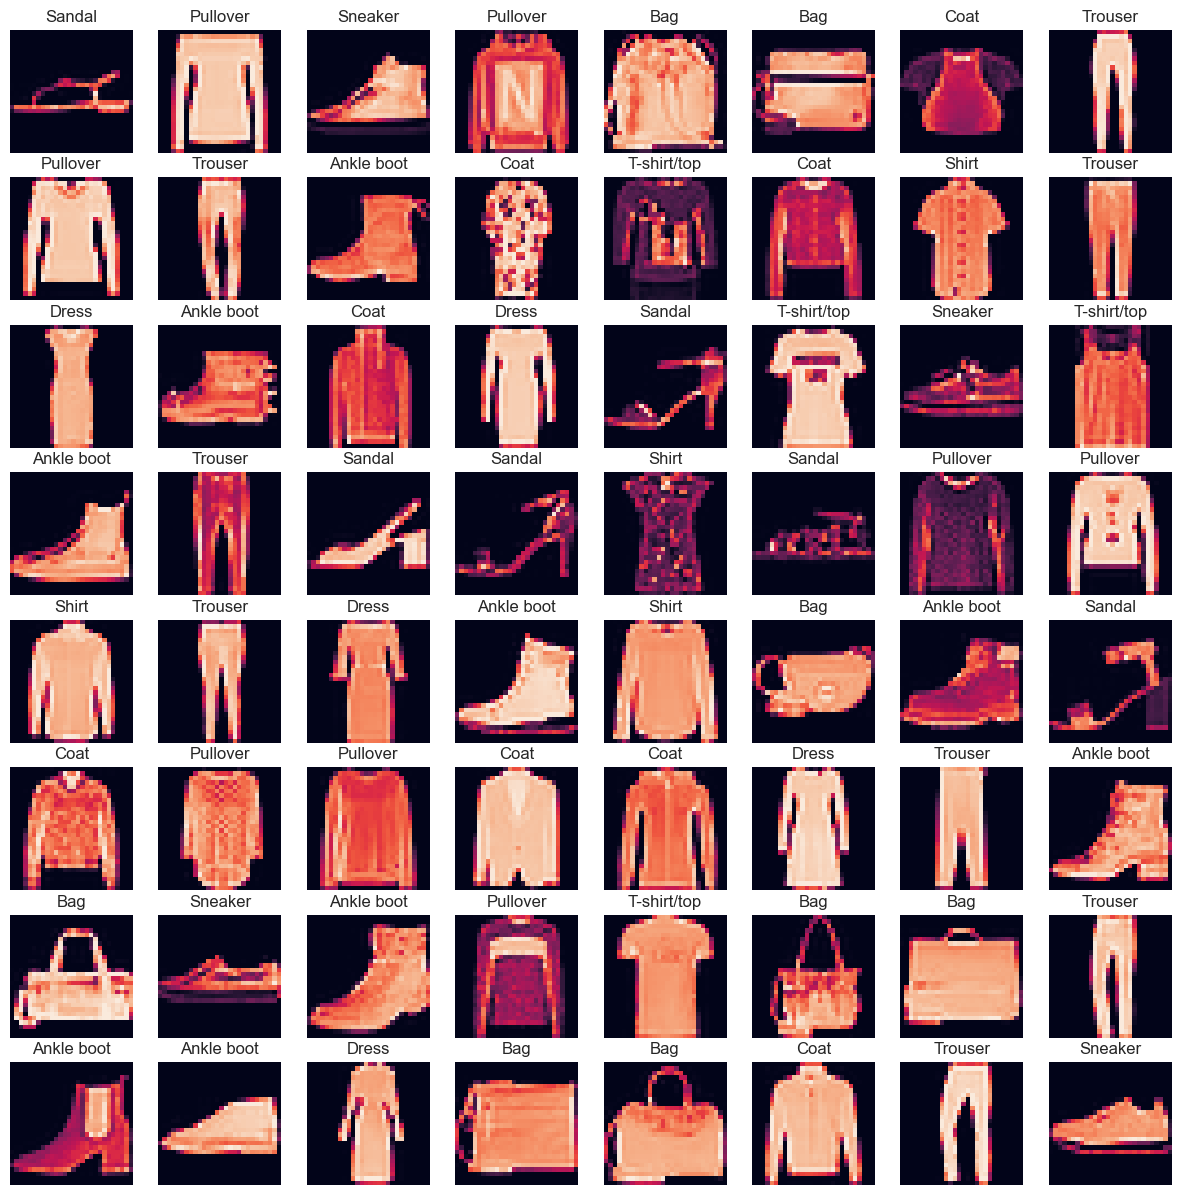

In [15]:
plt.figure(figsize=(15, 15))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [16]:
X_train[8].min()

0

In [17]:
X_train[8].max()

255

In [18]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [19]:
X_train[8].min()

0.0

In [20]:
X_train[8].max()

1.0

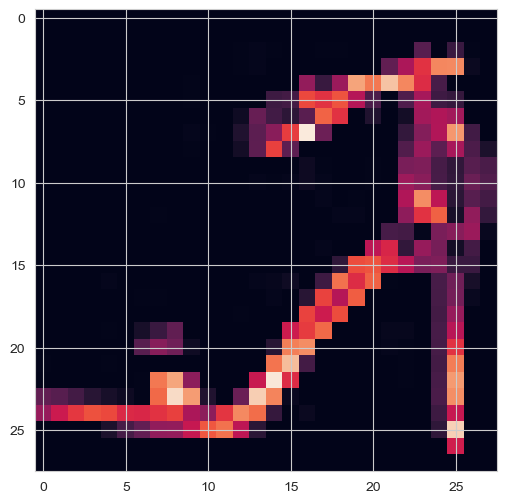

In [21]:
plt.imshow(X_train[8])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [23]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [27]:
y_train[0]

9

In [28]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

# BatchNormalization bir regularization tekniğidir ANN yapılarında da kullanılabilir.Ama özellikle CNN mimarilerinde
# daha iyi performans gösterdiği gözlemlenmiş.

In [30]:
model = Sequential()
model.add(Conv2D(28, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(28, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 28)       112       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 28)        7084      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 28)       112       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                        

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode = "min", patience=2, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 176s 92ms/step - loss: 0.9612 - accuracy: 0.6608 - val_loss: 0.4817 - val_accuracy: 0.8148
Epoch 2/50
1875/1875 [==============================] - 194s 104ms/step - loss: 0.5363 - accuracy: 0.8143 - val_loss: 0.3525 - val_accuracy: 0.8707
Epoch 3/50
1875/1875 [==============================] - 197s 105ms/step - loss: 0.4402 - accuracy: 0.8546 - val_loss: 0.3084 - val_accuracy: 0.8925
Epoch 4/50
1875/1875 [==============================] - 206s 110ms/step - loss: 0.3979 - accuracy: 0.8700 - val_loss: 0.2855 - val_accuracy: 0.8995
Epoch 5/50
1875/1875 [==============================] - 209s 112ms/step - loss: 0.3629 - accuracy: 0.8807 - val_loss: 0.2693 - val_accuracy: 0.9046
Epoch 6/50
1875/1875 [==============================] - 205s 109ms/step - loss: 0.3438 - accuracy: 0.8873 - val_loss: 0.3110 - val_accuracy: 0.8852
Epoch 7/50
1875/1875 [==============================] - 202s 108ms/step - loss: 0.3250 - accuracy: 0.8935 - val_l

In [ ]:
X_train.shape

In [ ]:
Y_train.shape

**TASK 7: Plot values of metrics you used in your model.**

In [ ]:
model.metrics_names

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

In [ ]:
summary[["loss", "val_loss"]].plot();

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.evaluate(X_test, Y_test)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
pred_prob = model.predict(X_test)
pred_prob

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
classes

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

##Prediction

In [ ]:
my_image = X_test[52]

In [ ]:
my_image.shape

In [ ]:
plt.imshow(my_image)

In [ ]:
image_prediction = model.predict(my_image.reshape(1, 28, 28, 1))

In [ ]:
image_prediction

In [ ]:
np.argmax(image_prediction, axis=1)

In [ ]:
result=np.argmax(image_prediction, axis=1)

In [ ]:
result

In [ ]:
classes[int(result)]

In [ ]:
y_test[52]

In [ ]:
model.save("fashion.h5")

## Load the Saved Model and Get Predictions

In [ ]:
model = tf.keras.models.load_model('fashion.h5')

In [ ]:
X_test[217].shape

In [ ]:
np.expand_dims(X_test[217],axis=0).shape

In [ ]:
pred=model.predict(np.expand_dims(X_test[217],axis=0))

In [ ]:
np.argmax(pred)

In [ ]:
plt.imshow(X_test[217])

In [ ]:
classes[6]

In [ ]:
y_test[217]

# End of Assignment